## Introducción al Deep Learning - Feed-Forward Network

In [10]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import argparse

Definición de los metodos

In [33]:
import matplotlib.pyplot as plt

def plot_grid(X, y, grid_size, labelNames):
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i in range(grid_size):
        for j in range(grid_size):
            ax = axes[i, j]
            index = i * grid_size + j

            # Asegúrate de no exceder el tamaño del conjunto de datos
            if index >= len(X):
                break

            ax.imshow(X[index], cmap='gray')  # Las imágenes de MNIST son en escala de grises
            ax.axis('off')
            ax.set_title(f'Label: {y[index]}')

    plt.show()


def print_metrics(predictions, X_test, y_test, labelNames, H, epochs):

    print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Cargamos dataset, leemos los datos y normalizamos los datos.


In [55]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

Analizamos los tamaños del dataset

In [56]:
# Verificamos forma de los datos
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [57]:
print("Tamaño de X_train: ", X_train.shape[0])
print("Tamaño de X_test: ", X_test.shape[0])

print("Tamaño total del dataset: ", X_train.shape[0] + X_test.shape[0])


print("Porcentaje de datos de entrenamiento: ", X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))
print("Porcentaje de datos de test: ", X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]))


Tamaño de X_train:  60000
Tamaño de X_test:  10000
Tamaño total del dataset:  70000
Porcentaje de datos de entrenamiento:  0.8571428571428571
Porcentaje de datos de test:  0.14285714285714285


In [58]:
# Obtenemos los nombres de las clases de la base de datos
labelNames = ["0","1","2","3","4","5","6","7","8","9"]

print("Número de clases en el dataset: ", len(labelNames))


Número de clases en el dataset:  10


In [59]:
# Contar el numero de casos diferentes en una lista
unique, counts = np.unique(y_train, return_counts=True)
print("Numero de casos y su distribucion en el dataset de entrenamiento: ", dict(zip(unique, counts)))

Numero de casos y su distribucion en el dataset de entrenamiento:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


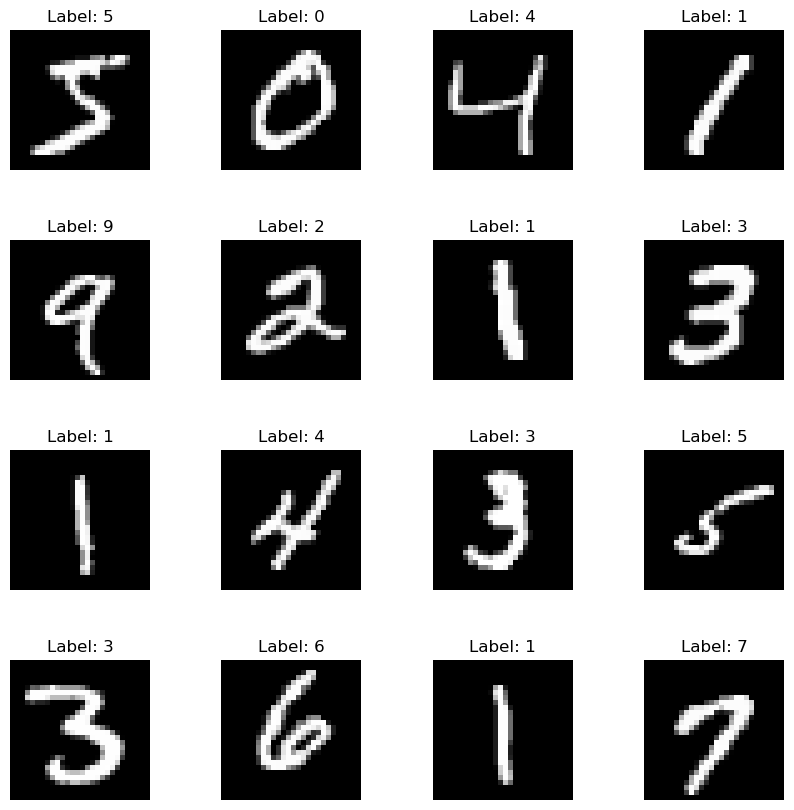

In [34]:
plot_grid(X_train, y_train, 4, labelNames)

Preparación de los datos de entrada

In [60]:
# Normalizamos los valores de la imagenes entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [61]:
print("Tamaño de la imagen:", X_train[0].shape)
print("---------")
# Como las imágenes de MNIST son de 28x28 píxeles, solo necesitas multiplicar estas dos dimensiones
print("Tamaño del vector de la imagen:", X_train[0].shape[0] * X_train[0].shape[1])
print("Tamaño del vector de la imagen al aplanar:", X_train[0].flatten().shape[0])


Tamaño de la imagen: (28, 28)
---------
Tamaño del vector de la imagen: 784
Tamaño del vector de la imagen al aplanar: 784


In [62]:
# Convertimos las imagenes (matrices) en vectores planos de 784 elementos
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))

In [63]:
# Binariamos las etiquetas (one-hot encoding), conviertiendolas de un valor numerico a un vector de 10 elementos
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

print(f"Nueva estructura de las etiquetas -> {y_test[0]}")

Nueva estructura de las etiquetas -> [0 0 0 0 0 0 0 1 0 0]


### Diseño de la Red Neuronal

Llegados a este punto, hemos preparado los datos de entrada, por lo que los requisitios para el diseño de la RN serán:

 - Debe tener **784** neuronas en la capa de **entrada**
 - Debe tener **10** neuronas en la capa de **salida**
 - Necesitamos una función de activacion de clasificacion multicalse -> **softmax**


In [64]:
model = Sequential()
model.add(Dense(1024, input_shape=(784,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [65]:
sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
 	epochs=50, batch_size=150)

Epoch 1/50
400/400 [==============================] - 3s 7ms/step - loss: 1.1157 - accuracy: 0.7673 - val_loss: 0.5354 - val_accuracy: 0.8804
Epoch 2/50
400/400 [==============================] - 2s 6ms/step - loss: 0.4573 - accuracy: 0.8857 - val_loss: 0.3733 - val_accuracy: 0.9018
Epoch 3/50
400/400 [==============================] - 3s 6ms/step - loss: 0.3620 - accuracy: 0.9022 - val_loss: 0.3208 - val_accuracy: 0.9123
Epoch 4/50
400/400 [==============================] - 3s 6ms/step - loss: 0.3203 - accuracy: 0.9111 - val_loss: 0.2924 - val_accuracy: 0.9194
Epoch 5/50
400/400 [==============================] - 3s 6ms/step - loss: 0.2938 - accuracy: 0.9178 - val_loss: 0.2713 - val_accuracy: 0.9251
Epoch 6/50
400/400 [==============================] - 2s 6ms/step - loss: 0.2743 - accuracy: 0.9228 - val_loss: 0.2565 - val_accuracy: 0.9290
Epoch 7/50
400/400 [==============================] - 2s 6ms/step - loss: 0.2584 - accuracy: 0.9270 - val_loss: 0.2419 - val_accuracy: 0.9325
Epoch 

##### Haciendo inferencia con el modelo entrenado

Usamos el modelo entrenado para precedir una imagen

Text(0.5, 1.0, '9')

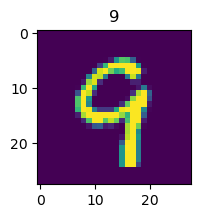

In [49]:
# Visualizamos la imagen antes de la clasificacion

index = 150

plt.figure(figsize=(2,2))

plt.imshow(X_test[index].reshape(28, 28))
plt.title(labelNames[y_test[index].argmax(axis=0)])

In [67]:
# Pasamos la imagen al modelo para obtener la prediccion
prediction = model.predict(X_test[index].reshape(1, 784))
prediction.argmax(axis=1)

print("Clase predicha para la imagen", labelNames[prediction.argmax(axis=1)[0]])

1/1 [==============================] - 0s 67ms/step
Clase predicha para la imagen 9


### Analizando el entrenamiento

In [68]:
predictions = model.predict(X_test, batch_size=150)

print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

67/67 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



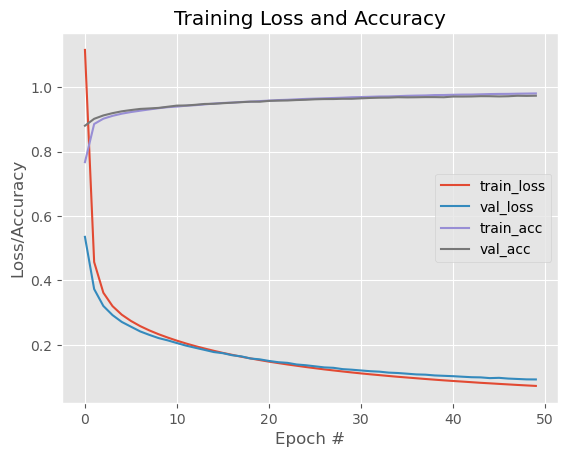

In [ ]:
print_metrics(predictions, X_test, y_test, labelNames, H, 200)

Entrenamos el modelo con 500 epocas

In [70]:
## Entrenamos el modelo con mas epocas

H = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=400, batch_size=150)

Epoch 1/400
400/400 [==============================] - 3s 6ms/step - loss: 0.0711 - accuracy: 0.9809 - val_loss: 0.0910 - val_accuracy: 0.9731
Epoch 2/400
400/400 [==============================] - 3s 6ms/step - loss: 0.0699 - accuracy: 0.9812 - val_loss: 0.0907 - val_accuracy: 0.9732
Epoch 3/400
400/400 [==============================] - 2s 6ms/step - loss: 0.0684 - accuracy: 0.9818 - val_loss: 0.0902 - val_accuracy: 0.9737
Epoch 4/400
400/400 [==============================] - 3s 6ms/step - loss: 0.0672 - accuracy: 0.9821 - val_loss: 0.0884 - val_accuracy: 0.9743
Epoch 5/400
400/400 [==============================] - 3s 6ms/step - loss: 0.0658 - accuracy: 0.9827 - val_loss: 0.0879 - val_accuracy: 0.9742
Epoch 6/400
400/400 [==============================] - 3s 7ms/step - loss: 0.0645 - accuracy: 0.9832 - val_loss: 0.0867 - val_accuracy: 0.9744
Epoch 7/400
400/400 [==============================] - 3s 6ms/step - loss: 0.0634 - accuracy: 0.9832 - val_loss: 0.0851 - val_accuracy: 0.9750

67/67 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



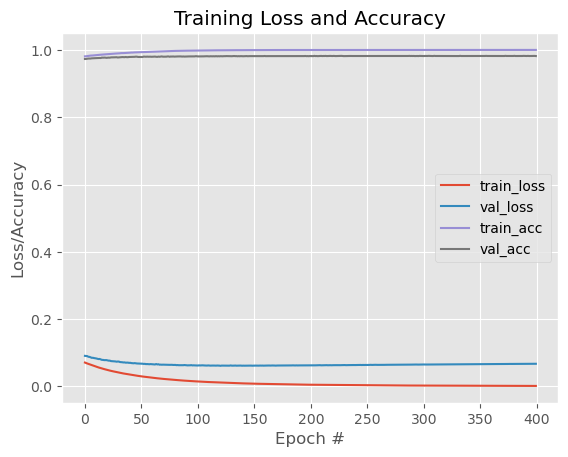

In [71]:
predictions = model.predict(X_test, batch_size=150)
print_metrics(predictions, X_test, y_test, labelNames, H, epochs=400)

# Conclusiones
Con 50 épocas ya empezamos a tener buenos valores del modelo, aunque con 500 es muco mejor podemossobreentrenar el modelo.
Es bueno aplicar dropout asi que lo óptimo sería algo como esto:


In [84]:
model_pg = Sequential()
model_pg.add(Dense(12, input_shape=(728,), activation="relu"))
model_pg.add(Dropout(0.6))
model_pg.add(Dense(512, activation="relu"))
model_pg.add(Dropout(0.6))
model_pg.add(Dense(256, activation="relu"))
model_pg.add(Dropout(0.6))
model_pg.add(Dense(10, activation="softmax"))

sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
 	epochs=100, batch_size=150)

Epoch 1/100
400/400 [==============================] - 6s 13ms/step - loss: 0.1433 - accuracy: 0.9565 - val_loss: 0.0986 - val_accuracy: 0.9689
Epoch 2/100
400/400 [==============================] - 5s 13ms/step - loss: 0.1380 - accuracy: 0.9596 - val_loss: 0.0977 - val_accuracy: 0.9688
Epoch 3/100
400/400 [==============================] - 5s 13ms/step - loss: 0.1382 - accuracy: 0.9585 - val_loss: 0.0968 - val_accuracy: 0.9688
Epoch 4/100
400/400 [==============================] - 5s 13ms/step - loss: 0.1362 - accuracy: 0.9586 - val_loss: 0.0966 - val_accuracy: 0.9694
Epoch 5/100
400/400 [==============================] - 5s 12ms/step - loss: 0.1356 - accuracy: 0.9598 - val_loss: 0.0952 - val_accuracy: 0.9693
Epoch 6/100
400/400 [==============================] - 5s 13ms/step - loss: 0.1315 - accuracy: 0.9606 - val_loss: 0.0944 - val_accuracy: 0.9703
Epoch 7/100
400/400 [==============================] - 5s 12ms/step - loss: 0.1337 - accuracy: 0.9604 - val_loss: 0.0933 - val_accuracy:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.98      0.94      0.96       892
           6       0.96      0.97      0.96       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



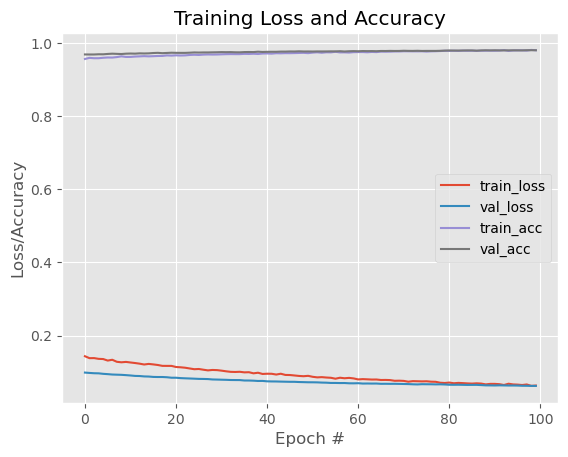

In [86]:
print_metrics(predictions, X_test, y_test, labelNames, H, 100)